# Install Python Packages


In [1]:
!pip install importlib-metadata==4.13. 0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Downloading the TRMM LIS Seasonal and Monthly Data from S3



In [2]:
import urllib.request 
urllib.request.urlretrieve("https://uwg.s3.amazonaws.com/VHRSC.nc", "VHRSC.nc")
urllib.request.urlretrieve("https://uwg.s3.amazonaws.com/VHRMC.nc", "VHRMC.nc")

('VHRMC.nc', <http.client.HTTPMessage at 0x7f541902e9d0>)

# Importing Python Packages and Calculating Mean, Max in the Seasonal Dataset based on Seasons

In [3]:
import xarray as xr
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.graph_objects as go

fh = xr.open_dataset('/content/VHRSC.nc')
Mean = []
Max = []
data = []
for i in range(0,4):
    matrix = fh['VHRSC_LIS_FRD'][i].values
    data.append(fh['VHRSC_LIS_FRD'][i].values)
    Mean.append(matrix.mean())
    Max.append(matrix.max())

# Plots to show Mean vs Seasons and Max vs Seasons

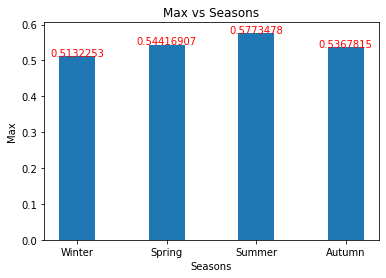

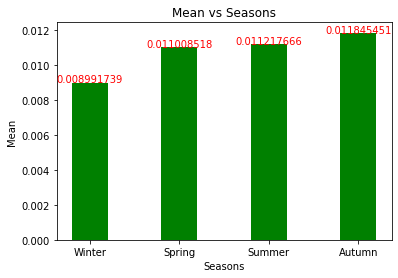

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha='center', color='red')

X = ['Winter','Spring','Summer','Autumn']

X_axis = np.arange(len(X))

plt.bar(X_axis, Max, 0.4, label = 'Max')

plt.xticks(X_axis, X)
addlabels(X, Max)
plt.xlabel("Seasons")
plt.ylabel("Max")
plt.title("Max vs Seasons")
plt.show()


plt.bar(X_axis, Mean, 0.4, label = 'Mean', color = 'green')
addlabels(X, Mean)
plt.xticks(X_axis, X)
plt.xlabel("Seasons")
plt.ylabel("Mean")
plt.title("Mean vs Seasons")
plt.show()

#Lightning Dataset Monthly Analysis

In [5]:
print('Please hit Enter key after you type in your input')
season_name = int(input(' Enter 0 for Winter, 1 for Spring, 2 for Summer, 3 for Autumn '))
num_div = int(input(' Enter Number of Bins '))
diff = data[season_name].max()/num_div

bins = [0]
for i in range(1,num_div+1):
    bins.append(i*diff)
df = pd.DataFrame(data[0].flatten())
df['bins'] = pd.cut(df[0], bins)
value_df = df['bins'].value_counts()

Please hit Enter key after you type in your input
 Enter 0 for Winter, 1 for Spring, 2 for Summer, 3 for Autumn 2
 Enter Number of Bins 4


#Plot to show Bins vs Count

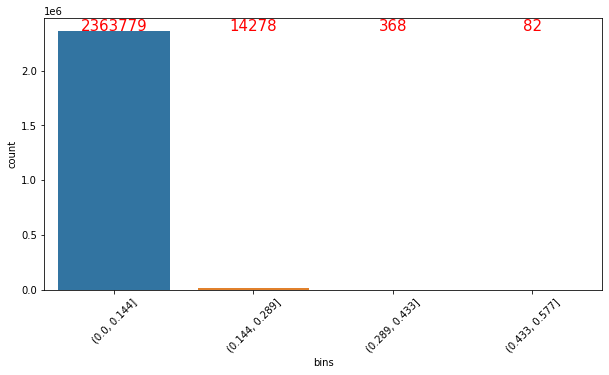

In [6]:
fig, ax1 = plt.subplots(figsize=(10,5))
graph = sns.countplot(ax=ax1,x='bins', data=df)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., value_df.max() + value_df.min(),
        height, ha="center", color="red", size=15)

#Monthly Flash Rate Data Density

In [7]:
ds = xr.open_dataset('/content/VHRMC.nc')
df = ds.to_dataframe()
new_df = df
new_df = new_df.reset_index()
df_dict = {}
for i in range(1,13):
  df_dict[i] = new_df[new_df['Month']==i]

print('Please Enter: 1 for January, 2 for February, 3 for March, 4 for April, 5 for May, 6 for June, 7 for July, 8 for August, 9 for September, 10 for October, 11 for November, 12 for December')
print('Please hit Enter key after you type in your input')
month_val = int(input('Please enter the Month:'))
month = df_dict[month_val]

month = month.sort_values(by=['VHRMC_LIS_FRD'],ascending=False)

values = month[month['VHRMC_LIS_FRD']>0.006]
values = values.head(500000)

month_dict = {1:"January", 2: "February", 3: "March", 4:"April", 5: "May", 6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12:"December"}

fig = go.Figure(go.Densitymapbox(lat=values['Latitude'], lon=values['Longitude'], z=values['VHRMC_LIS_FRD'],
                              radius=1),layout_title_text= 'Flash Rate Density Data for '+month_dict.get(month_val))
fig.update_layout(mapbox_style="stamen-terrain",  width=1100, height=600)
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#Animating Top 100 Hot Spots using Slider

In [8]:
import plotly.express as px
values = values.head(100)
fig = px.density_mapbox(df, lat=values['Latitude'], 
                            lon=values['Longitude'], 
                            z=values['VHRMC_LIS_FRD'],
                            radius=20,
                            animation_frame=values['VHRMC_LIS_FRD']
                                )
fig.update_layout(mapbox_style="stamen-terrain", mapbox_zoom=1.5,  width=1100, height=600)
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 600
fig.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 600
fig.layout.coloraxis.showscale = True   
fig.layout.sliders[0].pad.t = 10
fig.layout.updatemenus[0].pad.t= 10             

fig.show()